# Ten Years of the UEFA Champions League

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plot_utils as p_utils
from collections import defaultdict, Counter
import plot_utils as p_utils
%matplotlib inline

# Introduction

The UEFA Champions League is an annual club competition –beginning in the fall of one year and ending at the start of the summer of the following year– that takes place in Europe, in which the best teams from each leagues are invited to play. It’s arguably the most prestigious soccer tournament in the world. The question of whether or not a team will participate is determined from an array of factors, including performance in that team’s national league as well as Champions League performance during recent years; furthermore, there are two 'qualification streams' for teams that aren't invited directly to the tournament.

There’s several reasons why I chose to explore this subject. One of those reasons is that looking at the Champions League is an excellent way to examine what is going on in the world of football; it’s perhaps the best lens through which one can look at what clubs and which players are on the rise because of the fact that due to the tournament’s prestige and high monetary rewards, team managers almost always field their best players. This, combined with the fact that the tournament is comprised of essentially the best teams in the world, is strong justification for looking at this comptetion as a way to gain insight into who the world’s best are. Consider, for example, the issue of debuts: making a professional debut at the age of 17 is impressive in it’s own right, but the degree to how impressive it is depends on the league in which the player debuted. Making a debut at the age of 17 in the Greek league, for example, is not as impressive as debuting at 17 in the English Premier League (regarded as one of the most even and therefore most difficult in the world); making a debut at the age of 17 in the Champions League, on the other hand, is just about the most impressive debut there could be. It's also worth mentioning that I chose to look at the Champions League because of the richness and the completeness of the data that is available online. I scraped data off of Wikipedia and off of UEFA's Champions Leage website. I'd also considered scraping outfitter data from transfermarkt.com, but decided against it upon realizing that only the most up-to-date information on this was available, and not historical data.

Because of the richness of these data sources, my exploration can go deeper. I was able to explore variations in age, geographical origin, formation origin (where did this player learn to play football?), and see how these have changed over time. I explored questions such as: Has the average age of players in the champions league always been more or less the same? Does it fluctuate or do teams do a good job of having enough players of each age? Who plays in the Champions League? What’s the breakdown of the teams by country? What’s the breakdown of the players by country? What’s the breakdown of the teams by age? How has that changed over the years?

The data was found by scraping the two aforementioned websites, as well as sofifa.com; I used the latter to get 'skills' data to be able to compare teams skill levels. Anyone can use the scripts with which I scraped this data, although perhaps the best option to replicate this work or to simply get the data is to download it directly; it is all available in this project's github repo: https://github.com/ia2221/EDAV_Project, but is stored as namedtuples in binary format so it must be unpickled appropriately (note that to do this, the user must import pickle and have alal the relevant namedtuples defined). Plenty of examples of how to load the data will be shown in the Main Analysis section.

## Team

I worked on this project individually.

The stages of this project can be described as: scraping, then analyses, then more scraping, then final analyses. 

A lot of the data that I used came from [UEFA's Champions League website](http://www.uefa.com/uefachampionsleague/index.html); the first stage of my project was scraping this website. Every match that is played in the Champions League has a corresponding summary on a website such as [this one](http://www.uefa.com/uefachampionsleague/season=2016/matches/round=2000638/match=2015789/index.html). The urls of these websites are of the form `http://www.uefa.com/uefachampionsleague/season=SEASON_ID/matches/round=ROUND_ID/match=MATCH_ID/index.html`, where SEASON_ID, ROUND_ID, and MATCH_ID specify the particular match. Replacing the `/index.html` part with `/postmatch/lineups/index.html`, we can get to a page like [this one](http://www.uefa.com/uefachampionsleague/season=2016/matches/round=2000638/match=2015789/postmatch/lineups/index.html), in which details about the match can be found, including --amongst other things-- lineups, cards earned, substitution times, goals and the times at which they were scored, and manager names.

The very first part of my project, then, was to find all of the SEASON_IDs, all of the ROUND_IDs, and all of the MATCH_IDs and to store them in such a way that I could build the url to get the details page for every game that was played from 2007 to 2017. To do this, I wrote a scraper in python called `codes_fetcher.py`.

After having done this, I then used these ids to get to the 'lineups' and 'statistics' page (the latter being reached by appending `/postmatch/statistics/index.html` instead of `/postmatch/lineups/index.html`) for every match. For each match, I scraped both "general data" (such as match result, home team name, away team name, lineups, etc.) and "player data" such as (goals scored, yellow cards earned, red cards earned, minutes played, etc.). I did this using a scraper that I wrote in python: `match_data_fetcher.py`.

Next, I used the previously scraped data to obtain a list of teams and players. Using the list of teams, I scraped [sofifa.com](http://sofifa.com) to get "skills" data for every team. In doing this, I wanted to get a snapshot of what a particular team's skill levels looked like at a point in time closest to (but before) a match was played; I did this for every team and every match, using `team_fifa_stats_fetcher.py`. Using the list of players, I built a scraper (`wiki_player_data_fetcher.py`) to get --for every player-- the country of birth, the academy in which they did their youth career, and their date of birth (the latter I used to calculate each player's age at for every match in which they played or sat on the bench).

Lastly, I used all of this data to try to answer questions through graphical data analysis; this document includes (the cleaned-up version of) most of that analysis. As I carried out this analysis, I found mistakes that I'd made in scraping (and repeated the process), or shortcomings in the quality of the data provided by UEFA on their website.

## Analysis of Data Quality

Player outfitter data would have been very exciting to explore, but is unfortunately of suboptimal quality. This kind of data was not available at all until only a few years ago, and is crucial for exploring questions such as: what’s the market distribution of athletic outfitters in soccer? Does Nike dominate? Is it Adidas? How much of the market do these two take up, and who are the players in the rest of the market? Under-Armor, New Balance, Umbro?
One piece of data that's of suboptimal quality is the outfitter data. Unfortunately, though, transfermarkt.com only reports a player's _current_
outfitter. This drastically reduces the depth with which we can carry out our analysis because of the fact that players change endorsement deals over time, and so the
distribution of outfitter market shares over time would be impossible to visualize with the available data.
Consider the case of Puma, for example; Puma has bought out a lot of players who used to be
outfitted by either Nike or Adidas (Sergio Aguero, Alexis Sanchez, etc.). Then there's also players
who've switched from Nike to Adidas or vice-versa (Fernando Torres, Zlatan Ibrahimovic, Mesut Ozil,
etc.).

In addition to this, FIFA Player data is not available at all before 2007, and only incompletely
after that. Because of this, we're limited to only focusing on the last 10 year's seasons of the
Champions League; also because of this, we have to filter some teams out from our data collection.
That is, because FIFA Player data is not available for lesser-known teams such as Levski and
Kobenhavn for all years since 2007, we're can't scrape data for all teams in the competition for
every year. Thus we're required to filter out teams; in the interest of preserving interpretability,
we filter out the same way for every year: we only consider teams that qualified to the knockout
phase of the competition.

Another thing to note regarding data quality is that a lot of the match statisitcs for many matches
are missing. For example, for match with match_code 1116314, round_code 2357, season_code 2006,
there's one goal that Chelsea scored but that doesn't have the assist attributed to anyone; this is
either evidence of missing data or implies that Michael Essien scored the goal unassisted (perhaps
he stole the ball from the other team and scored). The latter, however, is unlikely. Moreover, the
hypothesis of missing data for this match is unarguably supported by the fact that there are no pass
statistics at all for any of the players! Given that there's no way a 90 minute soccer match was
played in which no passes at all were made, we can safely conclude that there is in fact at least
_some_ missing data for this match. With this insight, we can generalize our conclusion to be that
there's a lot of match statistics missing for a lot of matches (which are listed as zeros), and so that any match which is clearly missing some data cannot be used (the data that is present might be erroneous). To overcome this shortcoming, I only used years in which the data was available and correct for all players (2012 through 2016) for analyses that required these particular pieces of data.

Lastly, we must also note that data such as country of birth, age, and formation (especially the latter) will be missing for many players. This is because this data is pulled from Wikipedia; there are some players for which a Wikipedia article simply does not exist, and some other players for which an article does exist, but detailed information including the formation piece is not provided. On a similar vein, there are some teams that are simply not in EA's FIFA game franchise, and consequently do not appear in sofifa.com; we do not have skill data available for these teams.

Perhaps the most notorious example of missing data is the data that was pulled to answer the question of where players played during their Youth Careers. Only looking at the years 2013 through 2016 (because the scraper was too slow to gather data beyond that), we see that we were unable to obtain this piece of data for the vast majority of players who participated in those years, as shown below.

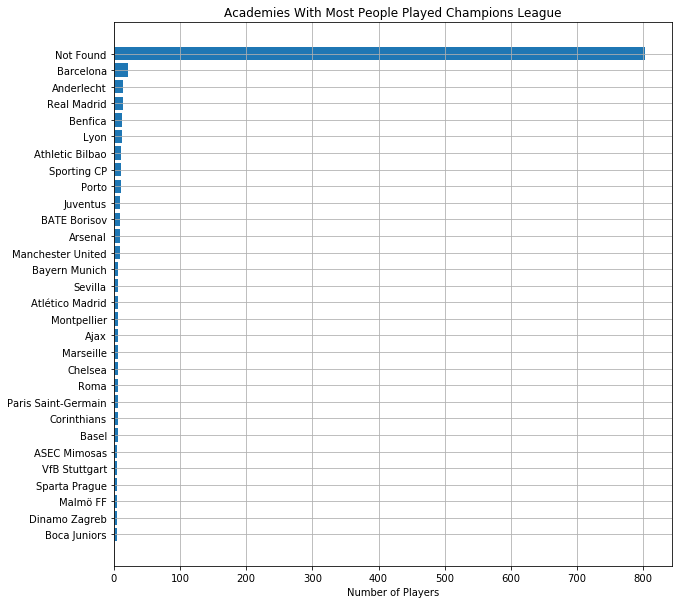

In [2]:
pd_gen_stats_df = pd.read_csv('data/csvs_for_nb/p_gen_stats_2013.csv', index_col=0)
pd_gen_stats_df = pd_gen_stats_df.replace(np.nan, 'Not Found')

name_form_df = pd_gen_stats_df.groupby(['name', 'formation']).count()

counts = defaultdict(int)

for i in range(len(name_form_df)):
    counts[name_form_df.index[i][1]] += 1
    
form_counts_df = pd.DataFrame(list(counts.items()), columns=['academy', 'count'])
s_form_counts_df = form_counts_df.sort_values(by='count', ascending=False)[:30]

p_utils.make_barplot(s_form_counts_df['academy'], s_form_counts_df['count'], 'Number of Players', 'Academies With Most People Played Champions League', (10,10))

The case is similar (although much less dramatic) for other pieces of information pulled by similar scrapers (age and country of birth).

Here, we see that there are some clear outliers in our dataset (our scraper concluded that someone who'd played the Champions League was 68 years old). The number of player-match pairs for which the age wasn't found was 4062 out of 42413 (or about 10%).

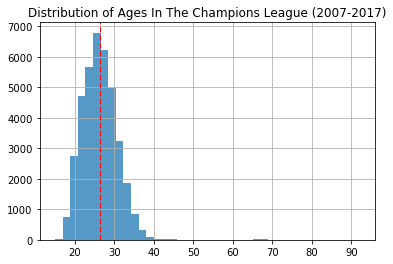

In [3]:
p_gen_stats_df = pd.read_csv('data/csvs_for_nb/p_gen_stats.csv', index_col=0)
p_gen_stats_df = p_gen_stats_df.replace(np.nan, 'Not Found')

ages = p_gen_stats_df[p_gen_stats_df['age'] != 'Not Found']['age'].values

n, bins, patches = plt.hist(ages, 40, alpha=0.75)
plt.grid()
_ = plt.title('Distribution of Ages In The Champions League (2007-2017)')
_ = plt.axvline(ages.mean(), color='r', linestyle='dashed', linewidth=1)

Similarly, there was 585 players (out of 3891) for which we were unable to find the country in which they were born; this is roughly 15% of all players

## Executive Summary

Data on the last ten years of the Champions League was gathered, graphical data analysis was used to learn about patterns and happenings that have occurred in relation to the Champions League in the last ten years.

It was found that the average age of the Champion's League player (around 26) has not changed much in the last ten years, but it does vary by the player's country of origin; Spain had relatively 'old' (age 27) players in the 2016 tournament, while Belgium had a lot of 'young' (age 23) players in that same tournament, Uruguay and Argentina had players of all ages although their average was 'old' (age 27 and age 28, respectively).

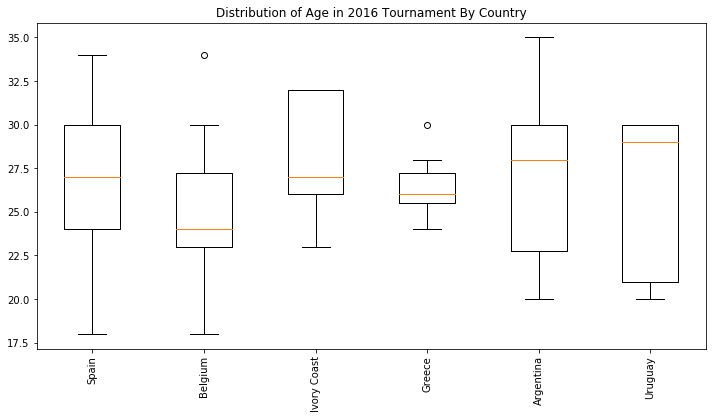

In [4]:
p_utils.make_ageplot()

My analysis also looked into club's participation and performance over the years. I found that there's a few clubs (such as Real Madrid) that have historically been participative and successful, there's clubs that are only just now participating and are being successful, and there's clubs that have more or less always participated but seldom been successful.

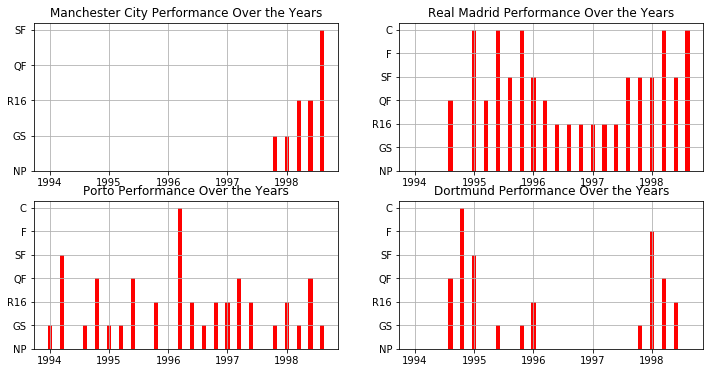

In [5]:
p_utils.plot_club_performances()

During my analysis, I also wanted to explore the question on where players were learning to play soccer. Although I was not able to get data for this for more than just 2013 through 2016 (because the scraper that I wrote to gather this data was too slow), looking into this is a nice window to the world of player development. My analysis found that the youth academy that exported the most players was [Barcelona's renowned La Masia](https://en.wikipedia.org/wiki/La_Masia), and that [Anderlecht's](https://en.wikipedia.org/wiki/R.S.C._Anderlecht) academy has produced a lot of Belgium's current stars including Adnad Januzaj, Maroaune Felaini, and Vincent Kompany.

My analysis also looked at different aspects of player's participations over the last ten years. Using match statistics provided by UEFA for each player and for each match, I was able to look into look into how different forms of participation vary. More specifically, I looked at penalty kicks (attempted and scored), yellow and red cards earned, passes completed, appearences, fouls committed and fouls suffered.

I found that red cards are very rare in the Champions League, with the player who's earned the most being Zlatan Ibrahimovic with four. In-game penalties (not kick-off penalties) are also a rare ocurrence in the Champions League; the players who've attempted the most in the last ten years have been Cristiano Ronaldo and Lionel Messi (with 11 and 12 attempts, respectively), with the latter player being the more efficient.

Perhaps the most interesting part of my analysis on player participations is the number of fouls committed and suffered. To analyze this, I considered a metric that took into account the number of minutes that a player had played (how long the person had been exposed to fouling or being fouled), but was conditional on them having played a number of minutes more than one standard deviation above the average number of minutes played. Because of the poor quality of this data from the UEFA website for years further in the past, I decided to only look at the last five years (2012 through 2016). From this, I found that Raul Garcia and Olivier Giroud have been the players who foul the most, and that Eden Hazard and Neymar and have been the ones who get fouled the most.

I carried out a similar analysis to look at player efficiency when passing (I used a similar conditional metric). From this, I found that the most efficient passers are generally midfielders, with Lucas, Jvier pastore, Jardel, and Isco having been the most efficient. This analysis was limited in the same way that the previously discussed one was (the only quality data was of the last five years).

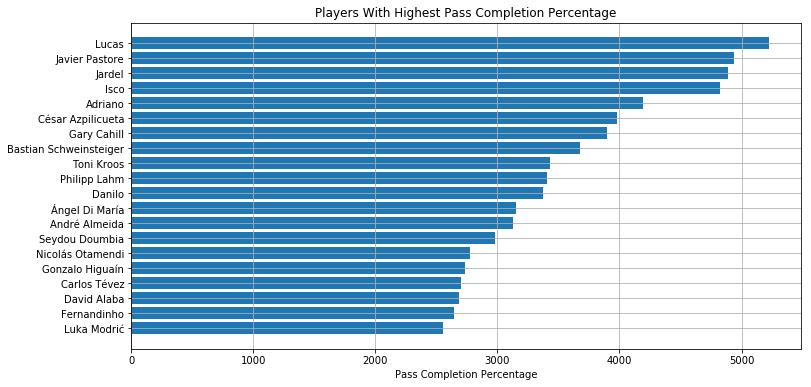

In [6]:
p_utils.plot_pass_efficiency()

Lastly, I also explored the question of whether teams that reached the semi-final stage were really that much better than those who were eliminated in the group stage. To do this, I took skill measurements ('Overall', 'Attack', 'Midfield', 'Defense') for every team for each match they played (note that these skill measurements change over time); these measurements are those that are included in EA's FIFA video game franchise - FIFA skill data is available at [sofifa.com](http://sofifa.com) (at a team level and at a player level). Toward answering this question, I averaged the skill levels of all teams that were eliminated in the Group stage (of all years) and those of teams that qualified to the semi-finals (of all years); I then compared these using a radarplot. What I found was not just that there wasn't a big difference between the two, but also that they were both pretty well-rounded.

## Main Analysis

##### Champions League History

We first try to answer some questions about the Champions League in general, and then we focus on the Champions League in the last ten years.

Let’s look at how countries are represented in the Champions League. Historically, which countries have had the most representers? We say that a country "had a representer" in the Champions League if a team from that country played in the Champions League on any given year.

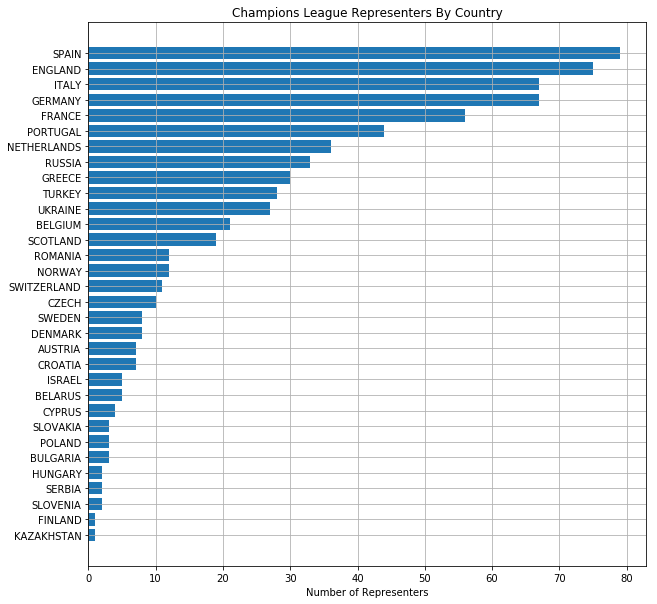

In [7]:
c_parts = pd.read_csv('data/csvs_for_nb/country_participations.csv', index_col=0)
c_parts.columns = ['country', 'num_par']
p_utils.make_barplot(c_parts['country'], c_parts['num_par'], 'Number of Representers', 'Champions League Representers By Country', (10,10))

We see that a few countries have been represented (by some club from that country) a lot, while many have been represented only a few times. Could this be because the set of clubs which participate in the Champions League for every year doesn't change much over the years? (That is: is it that the same clubs play the Champions League every year, more or less?). Let's look at the number of participations that each club has had.

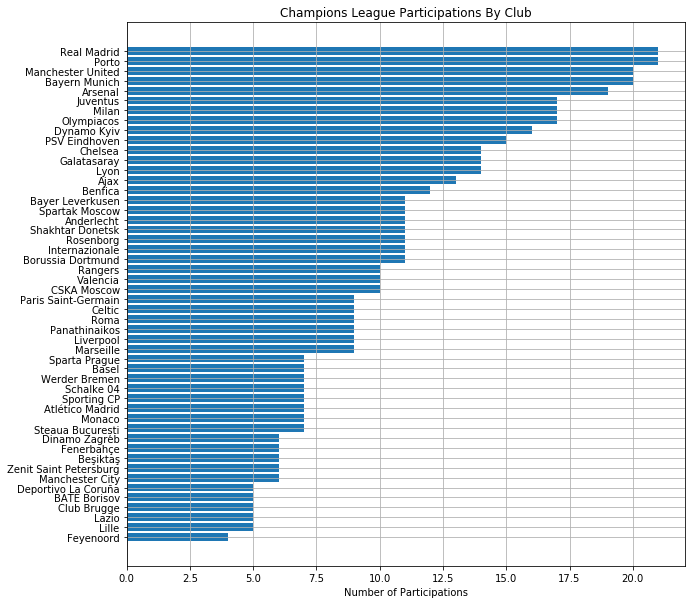

In [8]:
cl_part = pd.read_csv('data/csvs_for_nb/club_partic.csv')
cl_part.columns = ['club', 'num_par']
cl_part_short = cl_part.sort_values(by='num_par', ascending=False)[:50]
p_utils.make_barplot(cl_part_short['club'], cl_part_short['num_par'], 'Number of Participations', 'Champions League Participations By Club', (10,10))

We see that indeed there's some clubs that have played the Champions League a lot, and some that have played only a few times. Observe that teams such as Manchester City and Atletico Madrid have had relatively few Champions League participations -- are those recent? Is it that those teams simply didn't participate in the Champions League much in the past because they weren't that good, but now they are and they do?

Let's look at the performance of Atletico Madrid over the years. To do this, we consider that they could either have been "Not Participant", "Knocked out on Group Stage", "Eight-Finalist", "Quarter-Finalist", "Semi-Finalist", "Finalist", or "Champion". We encode these categories into [0, 1, 2, 3, 4, 5, 6], and see how Atletico has done over the years.

In [9]:
perf = pd.read_csv('data/csvs_for_nb/table.csv')

def plot_club_performance(team_name):
    club_perf = list(perf[perf['Club (# of participations)'].str.contains(team_name)].iloc[:,1:25].values[0])
    club_perf = ['R16' if p == 'GS2' else p for p in club_perf] # when there was a second Group Stage, there was no round of 16 (same thing though)
    perf_cats = ['NP', 'GS', 'R16', 'QF', 'SF', 'F', 'C']
    cat_vals = [0, 1, 2, 3, 4, 5, 6]
    club_perf_vals = [cat_vals[perf_cats.index(p)] for p in club_perf]

    N = len(club_perf_vals)

    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig, ax = plt.subplots()

    ax.bar(ind, club_perf_vals, width, color='r')
    ax.set_title("Champions League Performance of {} Over the Years".format(team_name))
    ax.set_yticklabels(perf_cats)
    ax.set_xticklabels(range(1993, 2016))
    ax.grid()

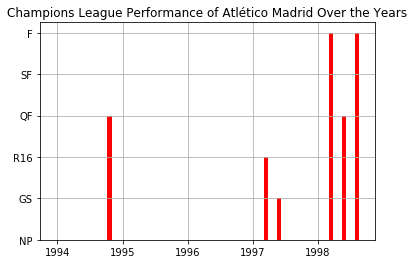

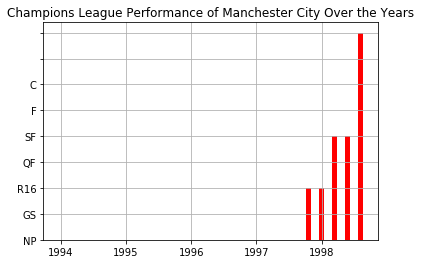

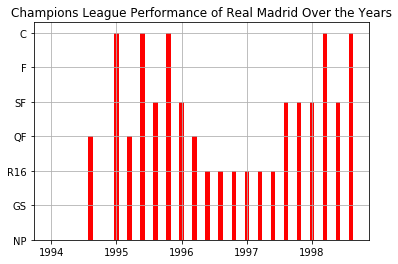

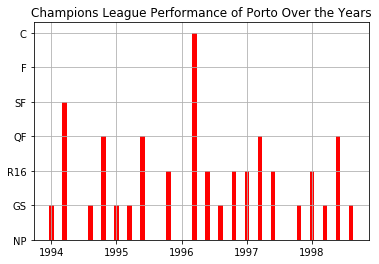

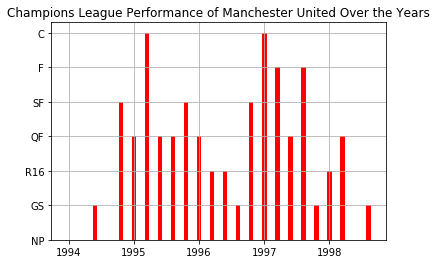

In [10]:
for team_name in ['Atlético Madrid', 'Manchester City', 'Real Madrid', 'Porto', 'Manchester United']:
    plot_club_performance(team_name)


So we see that clubs like Atletico Madrid and Manchester City historically haven't participated much, but have taken part of the tournament recently and have done well doing so. Other teams, such as Real Madrid have consistenly had good performances while teams such as Porto have consistently had poor-to-regular performances. Lastly, other teams such as Manchester United have had both periods of time of good performances and of bad-to-regular perfomances.

##### Geographical and Football (Educational) Origin

Let's now focus on the Champions League in the last ten years.

In [11]:
p_gen_stats_df = pd.read_csv('data/csvs_for_nb/p_gen_stats.csv', index_col=0)
p_gen_stats_df = p_gen_stats_df.replace(np.nan, 'Not Found')

What's the distribution of country representations by players? How has that changed over time?

In [12]:
name_country_df = p_gen_stats_df.groupby(['name', 'cob']).count()

counts = defaultdict(int)

for i in range(len(name_country_df)):
    counts[name_country_df.index[i][1]] += 1
    
country_counts_df = pd.DataFrame(list(counts.items()), columns=['country', 'count'])

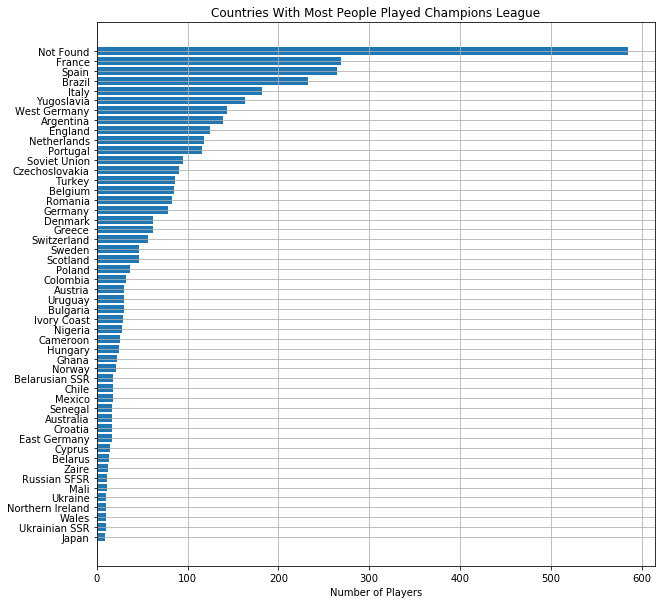

In [13]:
c_counts = country_counts_df.sort_values(by='count', ascending=False)[:50]
p_utils.make_barplot(c_counts['country'], c_counts['count'], 'Number of Players', 'Countries With Most People Played Champions League', (10,10))

Interestingly, we see a lot of players having come from South America to play the Champions League (note that Brazil has historically been the 3rd most represented country in the tournament, and Argentina the seventh). These are ahead of many European countries. Has it always been this way, or could it be that at first the Champions League was played primarily by European players, but in recent years it's become a more and more international tournament? Let's see if we can make similar plots, but by year.

In [14]:
p_gen_stats_df['year'] = pd.Series(map(lambda x: int(x.split('/')[-1]), p_gen_stats_df['date']))

def make_barplot_for_year(year, p_gen_stats_df):
    name_country_df = p_gen_stats_df[p_gen_stats_df['year']==year].groupby(['name', 'cob']).count()

    counts = defaultdict(int)

    for i in range(len(name_country_df)):
        counts[name_country_df.index[i][1]] += 1

    country_counts_df = pd.DataFrame(list(counts.items()), columns=['country', 'count'])
    
    c_counts = country_counts_df.sort_values(by='count', ascending=False)[:30]
    p_utils.make_barplot(c_counts['country'], c_counts['count'], 'Number of Players', 'Countries With Most People Played Champions League {}'.format(year), (7,7))
    


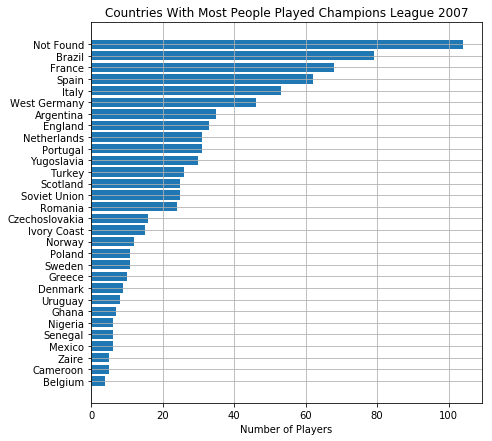

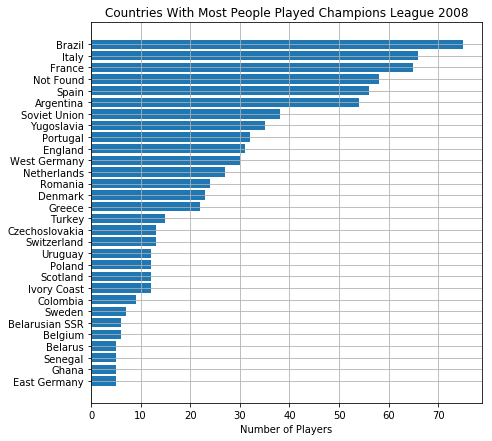

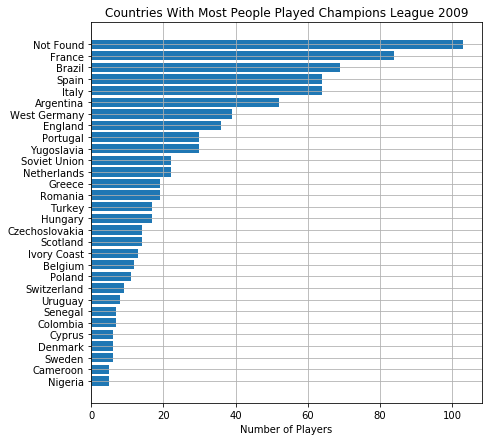

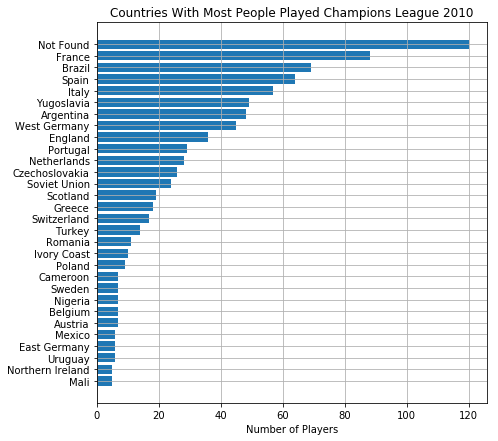

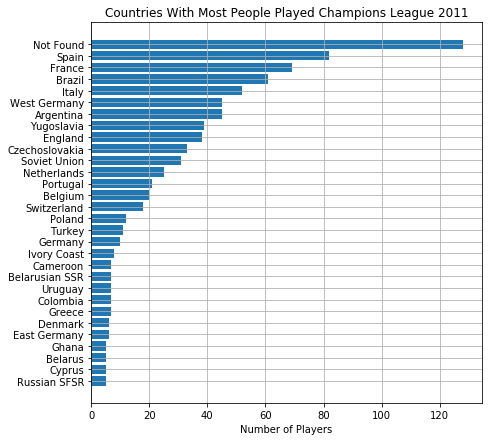

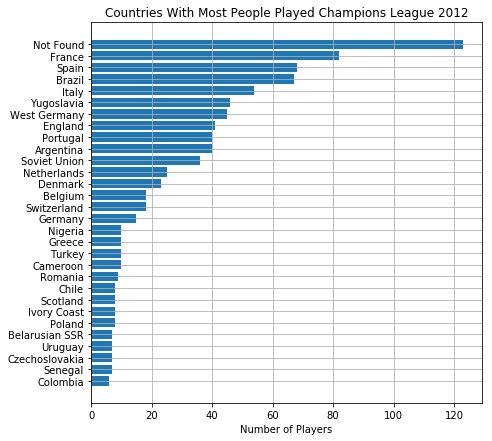

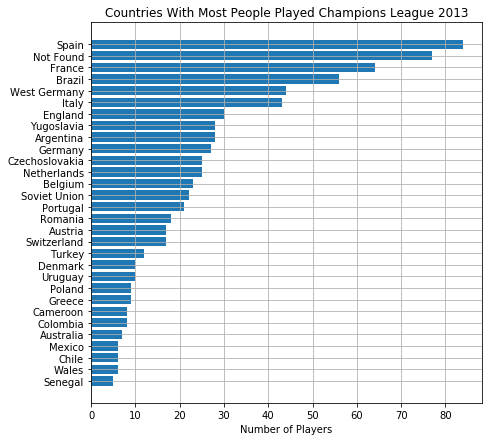

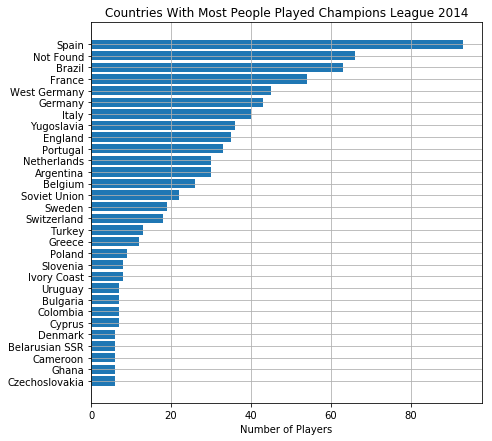

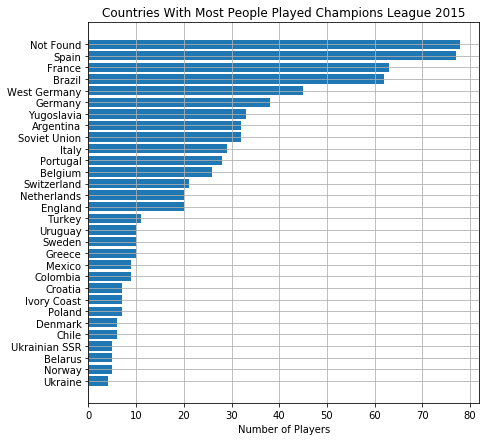

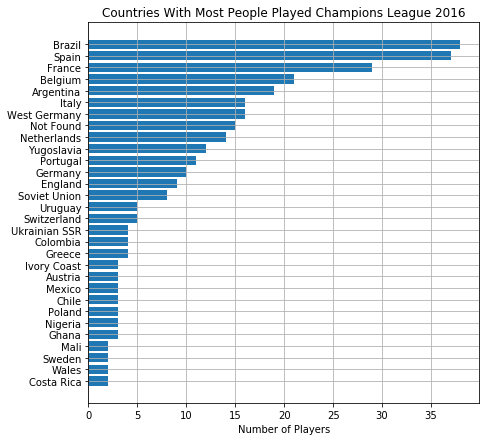

In [15]:
for year in range(2007, 2017):
    make_barplot_for_year(year, p_gen_stats_df)

So we see that whereas ten years ago the only South American countries that were amongst the top 20 most represented countries (in general) were Brazil and Argentina, Uruguay has intermintently been one of the most represented countries, and --in recent years-- countries such as Mexico and Colombia have become one of the 20 most well-represented.

What's the distribution of player's age? Let's consider that --for every Champions League match-- there's been at least 22 people of different ages playing. We've collected data that tells us what each player's age was at that point in time, so we can count the frequency with which every age has appeared in a Champions League match and make a histogram.

First, we note that there's been 4062 moments in time in which a person played the Champions League for which we don't know what that person's age at the time was.

In [16]:
print('The number of NAs in our dataset for the age attribute is: {}'.format(
    p_gen_stats_df['age'].value_counts()['Not Found']))

The number of NAs in our dataset for the age attribute is: 4062


In [17]:
len(p_gen_stats_df['age'])

42413

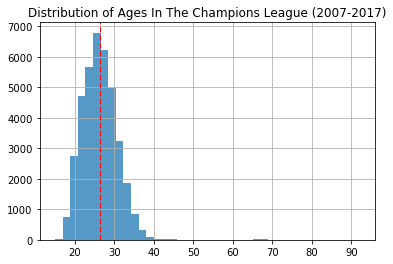

In [18]:
ages = p_gen_stats_df[p_gen_stats_df['age'] != 'Not Found']['age'].values

n, bins, patches = plt.hist(ages, 40, alpha=0.75)
plt.grid()
_ = plt.title('Distribution of Ages In The Champions League (2007-2017)')
_ = plt.axvline(ages.mean(), color='r', linestyle='dashed', linewidth=1)

We see at an outlier in our dataset. It looks like there's someone who played the Champions League at the age of 69! Let's see what the max, min, mean, and median of our ages are.

In [19]:
print("Min: {}".format(ages.min()))
print("Max: {}".format(ages.max()))
print("Mean: {}".format(ages.mean()))
print("Median: {}".format(np.median(ages)))

Min: 15.0
Max: 92.0
Mean: 26.284034314620218
Median: 26.0


Someone played the Champions League at 92?! Highly unlikely. Someone played at 15? Very believeable. Let's check the dataframe to see who the these people are. Once we get the person's name, we can look for him in Wikipedia. It's possible that the age for this person is wrong because this person shares the name with someone else who --at the time that particular match was played-- was 92 years old.

In [20]:
p_gen_stats_df[p_gen_stats_df['age'].isin([15, 92])]

,date,club,name,age,cob,formation,year
1273,17/10/2006,Man. United,David Jones,92,Wales,Not Found,2006
2152,01/11/2006,Man. United,David Jones,92,Wales,Not Found,2006
6400,06/11/2007,Olympiacos,Kyriakos Papadopoulos,15,Greece,Not Found,2007
7620,11/12/2007,Olympiacos,Kyriakos Papadopoulos,15,Greece,Not Found,2007


We see in https://en.wikipedia.org/wiki/Kyriakos_Papadopoulos that he holds the record for "Youngest Player to Play in the Greek League". We must also note that what we're looking at is a player's age when a match occurred, if that player *dressed* for that match (i.e. was included in the list of starting players or on those in the bench); so the player didn't necessarily play. This explains why even though Kyriakos Papadopoulos has the record for the Greek league but doesn't have it for the Champions League; he probably got picked to be on the bench that day --just in case the coach needed to put him in-- but did not get any playing time. Checking http://www.uefa.com/uefachampionsleague/season=2008/matches/round=15105/match=301220/postmatch/lineups/index.html, we verify that that was the case.

We see in https://en.wikipedia.org/wiki/David_Jones that there's been *many* David Joneses in history, and my scraper probably just confused our David Jones with some other David Jones. Let's temporarily remove him from our data to get a better look at the distribution of ages.

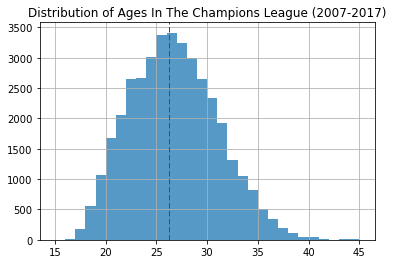

In [21]:
ages = p_gen_stats_df[~p_gen_stats_df['age'].isin(['Not Found'] + list(range(54, 100)))]['age'].values

n, bins, patches = plt.hist(ages, 30, alpha=0.75)
plt.grid()
_ = plt.title('Distribution of Ages In The Champions League (2007-2017)')
_ = plt.axvline(ages.mean(), color='r', linestyle='dashed', linewidth=1)

In [22]:
print("Min: {}".format(ages.min()))
print("Max: {}".format(ages.max()))
print("Mean: {}".format(ages.mean()))
print("Median: {}".format(np.median(ages)))

Min: 15.0
Max: 45.0
Mean: 26.24454479014408
Median: 26.0


This is pretty symmetric; it looks like the age follows a normal distribution. Has the distribution of ages changed as the years have passed? Let's use boxplots to investigate this.

In [23]:
good_p_gen_stats = p_gen_stats_df[~p_gen_stats_df['age'].isin(['Not Found'] + list(range(54, 100)))]

year_ages = list()
for year in range(2007, 2017):
    ages = list(good_p_gen_stats[good_p_gen_stats['year'] == year]['age'][~good_p_gen_stats[good_p_gen_stats['year'] == year]['age'].isin(['Not Found'])].values)
    year_ages.append(ages)

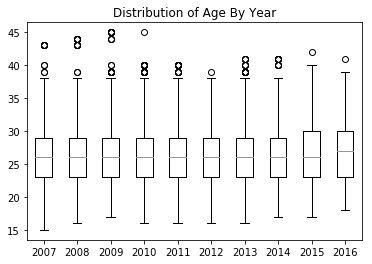

In [24]:
plt.boxplot(year_ages)
plt.title("Distribution of Age By Year")
plt.xticks(list(range(1,11)), list(range(2007, 2017)))
plt.show()

We see that the distribution of age hasn't changed much over the last ten years. Could it be that players from some countries are older than players from others? Perhaps South American players had long careers before being hired by a European club. Let's look into this by seeing the distribution of age by country for the season ending in 2016.

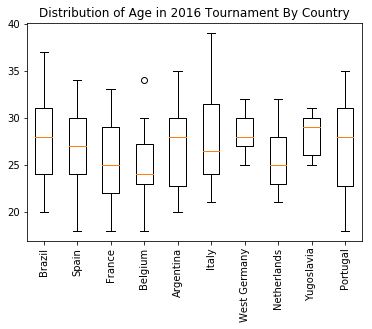

In [25]:
year = 2016
sixteen_df = good_p_gen_stats[good_p_gen_stats['year'] == year][~good_p_gen_stats[good_p_gen_stats['year'] == year]['age'].isin(['Not Found'])]
country_list = ['Brazil', 'Spain', 'France', 'Belgium', 'Argentina', 'Italy', 'West Germany', 'Netherlands', 'Yugoslavia', 'Portugal']
country_ages = list()
for country in country_list:    
    ages = list(sixteen_df[sixteen_df['cob'] == country]['age'][~sixteen_df[sixteen_df['cob'] == country]['cob'].isin(['Not Found'])].values)
    country_ages.append(ages)
    
plt.boxplot(country_ages)
plt.title("Distribution of Age in {} Tournament By Country".format(year))
plt.xticks(list(range(1,11)), country_list, rotation=90)
plt.show()

So we see that the distribution is more or less the same for all countries, with Portugal having a higher average age. Let's try doing the same thing, but with more South American countries.

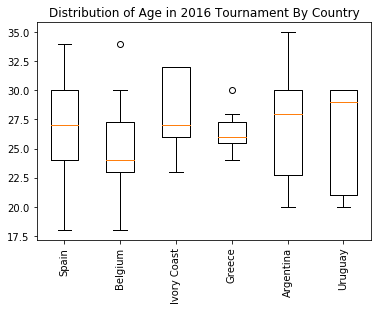

In [26]:
year = 2016
sixteen_df = good_p_gen_stats[good_p_gen_stats['year'] == year][~good_p_gen_stats[good_p_gen_stats['year'] == year]['age'].isin(['Not Found'])]
country_list = ['Spain', 'Belgium', 'Ivory Coast', 'Greece', 'Argentina', 'Uruguay']
country_ages = list()
for country in country_list:    
    ages = list(sixteen_df[sixteen_df['cob'] == country]['age'][~sixteen_df[sixteen_df['cob'] == country]['cob'].isin(['Not Found'])].values)
    country_ages.append(ages)
    
plt.boxplot(country_ages)
plt.title("Distribution of Age in {} Tournament By Country".format(year))
plt.xticks(list(range(1,len(country_list)+1)), country_list, rotation=90)
plt.show()

So we see that the distribution is more or less the same for all countries, with Mexico having a slightly higher average age.

Let's now look at where player's youth career was. This is of interest because it sheds light on which clubs invest heavily in the formation of new players. There might be some clubs which are very successful but that don't have a great 'academy' (don't produce a lot of players); there might also be clubs which produce a lot of players but aren't successful; there's also clubs that produce players and *are* successful. This is one of the most marked differences between Real Madrid and Barcelona (the two biggest rivals in the world of soccer); while Barcelona produces a lot of its own players (or players that go on to be successful at other clubs), Real Madrid does not and instead relies on buying talented players. There's also the case of clubs such West Ham and Southhampton; these clubs have historically been the base of the English national team (in the sense that they've produced a lot of the players that went on to represent England in international competitions, even though these players at the time were no longer in the aforementioned clubs), and yet haven't been wildly successful (they haven't ever even participated in the Champions League, for example).

As discussed in the *Analysis of Data Quality* section, we must highlight that this is only a sample of all of the players that played the Champions League from 2013 to 2016. This is because this piece of information is missing for a lot of players for one of the following reasons: the player did not have a Wikipedia article or the scraper that I wrote was not able to pull this information from Wikipedia (either because the player's identity was too difficult to disambiguate due to his/her name being so common, or because no years were listed in the player's 'Youth career' section.

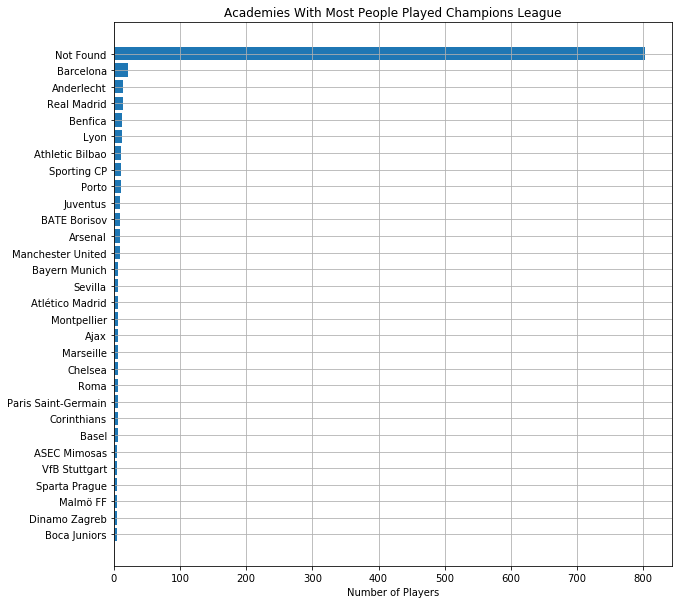

In [27]:
pd_gen_stats_df = pd.read_csv('data/csvs_for_nb/p_gen_stats_2013.csv', index_col=0)
pd_gen_stats_df = pd_gen_stats_df.replace(np.nan, 'Not Found')

name_form_df = pd_gen_stats_df.groupby(['name', 'formation']).count()

counts = defaultdict(int)

for i in range(len(name_form_df)):
    counts[name_form_df.index[i][1]] += 1
    
form_counts_df = pd.DataFrame(list(counts.items()), columns=['academy', 'count'])
s_form_counts_df = form_counts_df.sort_values(by='count', ascending=False)[:30]

p_utils.make_barplot(s_form_counts_df['academy'], s_form_counts_df['count'], 'Number of Players', 'Academies With Most People Played Champions League', (10,10))

So the overwhelming majority was not found. Let's get rid of that and take another look.

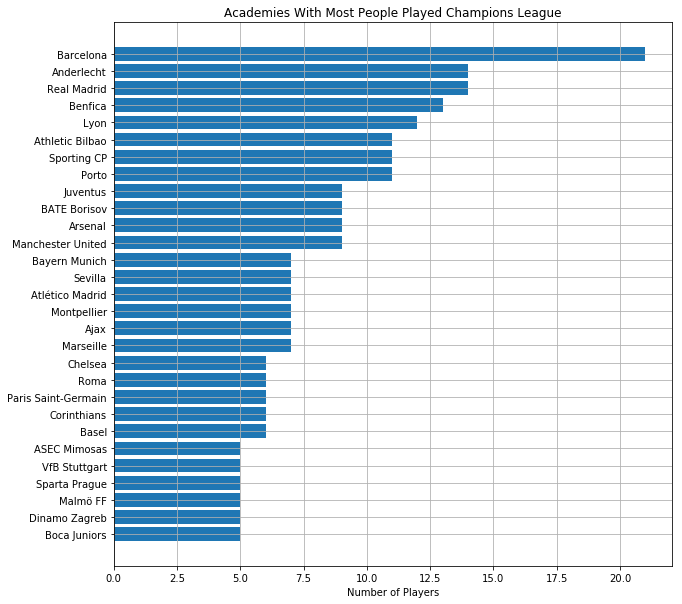

In [28]:
s_form_counts_df = s_form_counts_df[s_form_counts_df['academy'] != 'Not Found']
p_utils.make_barplot(s_form_counts_df['academy'], s_form_counts_df['count'], 'Number of Players', 'Academies With Most People Played Champions League', (10,10))

##### Player's Participations

Let's now analyze some of the player's data. This data comes from the csv file `p_stats_df.csv`, which is produced by running `get_player_stats_csv.py`.

In [29]:
p_stats_df = pd.read_csv('data/csvs_for_nb/p_stats_df.csv', index_col=0)

Who's scored the most goals?

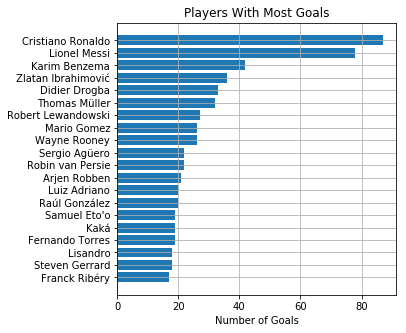

In [30]:
goals = p_stats_df.sort_values(by='goals', ascending=False)['goals'][:20]
p_utils.make_barplot(goals.index, goals.values, 'Number of Goals', 'Players With Most Goals', (5,5))

At first glance, Cristiano Ronaldo and Lionel Messi seem to be lightyears above everyone else. Although in reality they have scored the most goals in the Champions League (ever, in general), we must remember that this is only *over the last ten years*. It's also worth noting that some of the other players (such as Raul Gonzalez) are either now retired or had careers that started relatively long ago (and so a lot of these players' goals might have been scored more than 10 years ago).

Who's scored the most in-game (non-shootout) penalties?

In [31]:
p_stats_df['converted_pen'] = p_stats_df['penalties_in'] / (p_stats_df['penalties_in'] + p_stats_df['penalties_mi'])*100

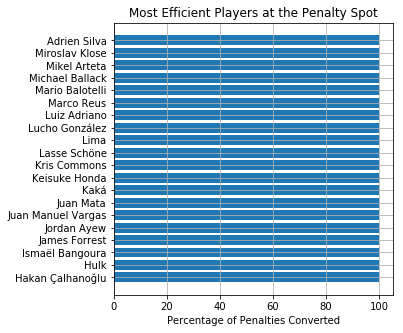

In [32]:
converted_pen = p_stats_df.sort_values(by='converted_pen', ascending=False)['converted_pen'][:20]
p_utils.make_barplot(converted_pen.index, converted_pen.values, 'Percentage of Penalties Converted', 'Most Efficient Players at the Penalty Spot', (5,5))

We see that there's a lot of players who've taken only a few penalties and scored all of them. Let's make our analysis conditional on having taken some threshold number of penalties. What should this threshold be? To answer that, let's see how many penalties people have taken.

In [33]:
(p_stats_df['penalties_in'] + p_stats_df['penalties_mi']).sort_values(ascending=False)[:50]

Lionel Messi              12
Cristiano Ronaldo         11
Thomas Müller              9
Sergio Agüero              8
Eden Hazard                6
Robin van Persie           5
Arturo Vidal               4
Luiz Adriano               3
Frank Lampard              3
Lucho González             3
Seydou Doumbia             3
Kaká                       3
Wayne Rooney               3
Roberto Soldado            3
Arjen Robben               3
Mario Balotelli            3
Steven Gerrard             3
Hakan Çalhanoğlu           2
Cesc Fàbregas              2
Antoine Griezmann          2
Samuel Eto'o               2
Mesut Özil                 2
Klaas-Jan Huntelaar        2
Diego Costa                2
Jackson Martínez           2
Simon Rolfes               2
Cléo                       2
Christian Noboa            2
Zlatan Ibrahimović         2
Frédéric Kanouté           2
Robert Lewandowski         2
David Luiz                 2
Kevin Gameiro              2
Alexander Frei             2
Didier Drogba 

So we see that the vast majority of people haven't taken any penalties. Of the people who have, most have taken only a few, and some have taken a lot more. (It seems that in-game penalties are somewhat rare in the Champions League, and that --at least in some teams-- the same people get called upon to take them.) Let's make our threshold 3.

In [34]:
p_stats_df['converted_pen'] = np.where(p_stats_df['penalties_in'] + p_stats_df['penalties_mi'] < 3, 0, p_stats_df['penalties_in'] / (p_stats_df['penalties_in'] + p_stats_df['penalties_mi'])*100)

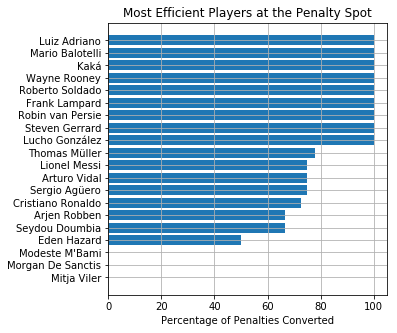

In [35]:
converted_pen = p_stats_df.sort_values(by='converted_pen', ascending=False)['converted_pen'][:20]
p_utils.make_barplot(converted_pen.index, converted_pen.values, 'Percentage of Penalties Converted', 'Most Efficient Players at the Penalty Spot', (5, 5))

Who earns the "4x4 Award"? (Who had the most appearances?)

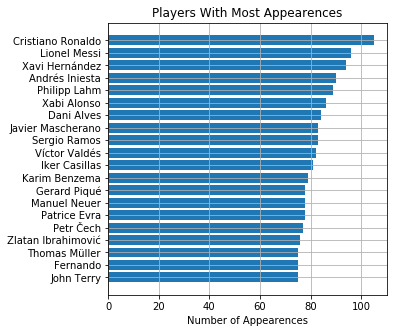

In [36]:
apps = p_stats_df.sort_values(by='apps', ascending=False)['apps'][:20]
p_utils.make_barplot(apps.index, apps.values, 'Number of Appearences', 'Players With Most Appearences', (5,5))

Perhaps a better way to see who earns the "4x4 Award" is by looking at who's had the most minutes.

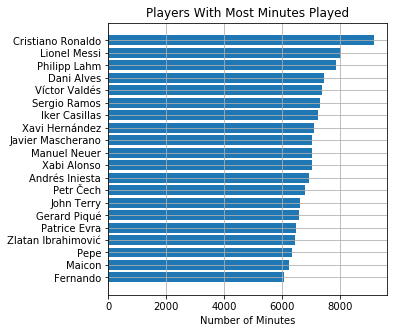

In [37]:
mins = p_stats_df.sort_values(by='minutes', ascending=False)['minutes'][:20]
p_utils.make_barplot(mins.index, mins.values, 'Number of Minutes', 'Players With Most Minutes Played', (5,5))

Who earns the "Bad Boy Award"? (Who has received the most red cards?)

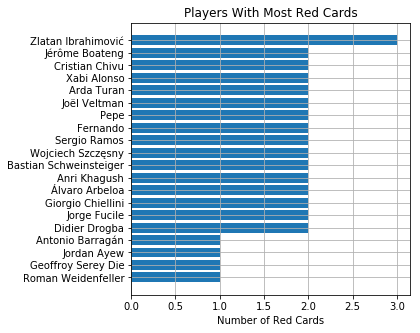

In [38]:
reds = p_stats_df.sort_values(by='red_cards', ascending=False)['red_cards'][:20]
p_utils.make_barplot(reds.index, reds.values, 'Number of Red Cards', 'Players With Most Red Cards', (5,5))

The most red cards anyone has gotten playing in the Champions League in the last ten years is 3? This is surprising, to say the least, and maybe even hard to believe. I looked this up, and found in this link https://www.statbunker.com/alltimestats/AllTimeRedCards?comp_code=UCL that my results completely make sense. The reason for the discrepancy between my data and that of the referenced website is that I'm looking at only the last 10 years. Zlatan Ibrahimovic, for example, has been playing in the Champions League for more than 10 years; the likely explanation is that he earned his 4th red card *more than 10 years ago*. This is the same case for a lot of the other players, many of which are now retired.

Let's look at who's earned the most yellow cards.

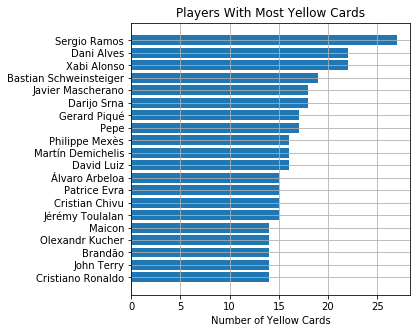

In [39]:
yellows = p_stats_df.sort_values(by='yellow_cards', ascending=False)['yellow_cards'][:20]
p_utils.make_barplot(yellows.index, yellows.values, 'Number of Yellow Cards', 'Players With Most Yellow Cards', (5,5))

Let's see who wins the "Piggy Award". (Who had committed the most fouls?)

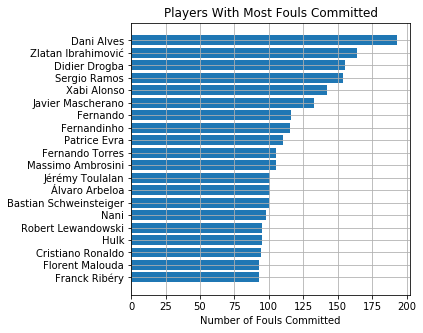

In [40]:
fouls_c = p_stats_df.sort_values(by='fouls_commited', ascending=False)['fouls_commited'][:20]
p_utils.make_barplot(fouls_c.index, fouls_c.values, 'Number of Fouls Committed', 'Players With Most Fouls Committed', (5,5))

Let's see who's suffered the most fouls (who's been fouled the most).

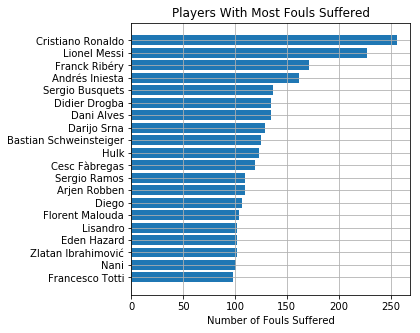

In [41]:
fouls_s = p_stats_df.sort_values(by='fouls_suffered', ascending=False)['fouls_suffered'][:20]
p_utils.make_barplot(fouls_s.index, fouls_s.values, 'Number of Fouls Suffered', 'Players With Most Fouls Suffered', (5,5))

We observe that we see the same players over and over. Upon closer inspection, we notice that for years further in the past, a lot of match statistics seem to be missing or simply unreliable, as discussed in the 'Analysis of Data Quality' section (see the statistics page for this match http://www.uefa.com/uefachampionsleague/season=2006/matches/round=2357/match=1116314/postmatch/statistics/index.html for example).

To alleviate this, we focus our analysis on only the last five years. Note that the previous analysis on number of appearences and number of minutes played is still valid; that is done with pieces of data that are **not** pulled from the 'Statistics' section of the match page. The pieces of data that we *can't* rely on for seasons before the one that ended in 2012 are: shots (on and off target), offsides, fouls (committed and suffered), and passes (attempted and completed).

Let's look at who were the players that commited the most fouls and suffered the most fouls in the past 5 years. To do this, we use `p_stats_2012_on_df.csv` csv file, produced by editing line 45 of `get_player_stats_csv.py` to iterate only over `range(2012, 2017)`, and line 89 to create and write to `p_stats_2012_on_df.csv`.

In [42]:
p_stats_five_df = pd.read_csv('data/csvs_for_nb/p_stats_2012_on_df.csv', index_col=0)

Back to the "Piggy Award". Who committed the most fouls in the last 5 years?

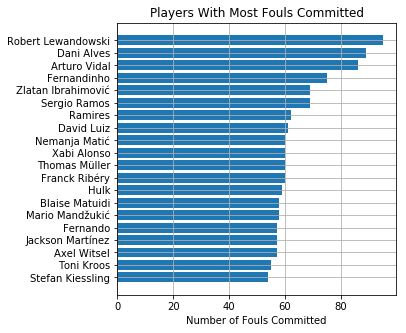

In [43]:
fouls_c = p_stats_five_df.sort_values(by='fouls_commited', ascending=False)['fouls_commited'][:20]
p_utils.make_barplot(fouls_c.index, fouls_c.values, 'Number of Fouls Committed', 'Players With Most Fouls Committed', (5,5))

Robert Lewandowski?!?! It makes sense that Dani Alves, Arturo Vidal, Fernandinho, Sergio Ramos, and (most of) the others are high up in the list, as they're either midfielders or defenders. One of the primary responsibilities of players who play these positions is recovering the ball (stealing it from the other team); oftentimes, a foul is committed in the process. Robert Lewandowski, Zlatan Ibrahimovic, Thomas Muller, Hulk, and Mario Mandzukic are forwards, though; their job is not explicitly to recover the ball. For this reason, it's a bit surprising at first to see them on this list. If we consider, however, that they often are the ones fighting with defenders to mantain possession, this makes more sense.

Let's now see who gets beat up the most.

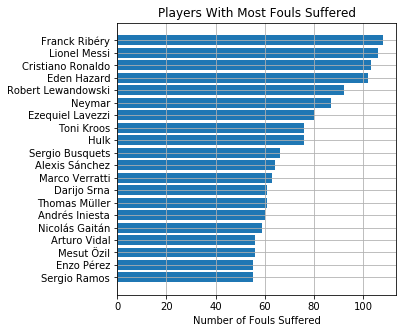

In [44]:
fouls_s = p_stats_five_df.sort_values(by='fouls_suffered', ascending=False)['fouls_suffered'][:20]
p_utils.make_barplot(fouls_s.index, fouls_s.values, 'Number of Fouls Suffered', 'Players With Most Fouls Suffered', (5,5))

Very interesting and completely believable. It's worth noting that Franck Ribery, Lionel Messi, Cristiano Ronaldo, and Eden Hazard seem to be more or less "broken away" from the rest. Although it's understandable that Robert Lewandowski doesn't get fouled as much as the first four, Neymar definitely does gets fouled as much as the aforementioned four. But Neymar has been in Europe (and thus playing the Champions League) for a lot less years than the first four have (the first four have played more games, and have thus been exposed to be fouled a lot more). Let's instead look at another metric: number of fouls committed/suffered *per minute played*.

In [45]:
p_stats_five_df['fc_per_min'] = p_stats_five_df['fouls_commited']/p_stats_five_df['minutes']
p_stats_five_df['fs_per_min'] = p_stats_five_df['fouls_suffered']/p_stats_five_df['minutes']

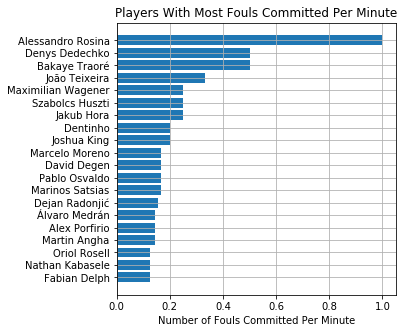

In [46]:
fouls_cpm = p_stats_five_df.sort_values(by='fc_per_min', ascending=False)['fc_per_min'][:20]
p_utils.make_barplot(fouls_cpm.index, fouls_cpm.values, 'Number of Fouls Committed Per Minute', 'Players With Most Fouls Committed Per Minute', (5,5))

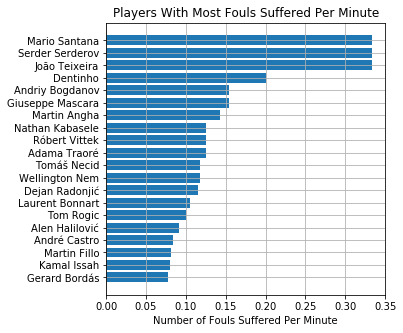

In [47]:
fouls_spm = p_stats_five_df.sort_values(by='fs_per_min', ascending=False)['fs_per_min'][:20]
p_utils.make_barplot(fouls_spm.index, fouls_spm.values, 'Number of Fouls Suffered Per Minute', 'Players With Most Fouls Suffered Per Minute', (5,5))

We see that these show players who don't play a lot (very few minutes), and so even though they're involved in only a few fouls, they show up high on the list. Let's redefine our metric to be conditional on minutes being greater than some threshold (one standard deviation above the mean).

In [48]:
p_stats_five_df['fc_per_min'] = np.where(p_stats_five_df['minutes'] < 1320, 0, p_stats_five_df['fouls_commited']/p_stats_five_df['minutes'])
p_stats_five_df['fs_per_min'] = np.where(p_stats_five_df['minutes'] < 1320, 0, p_stats_five_df['fouls_suffered']/p_stats_five_df['minutes'])

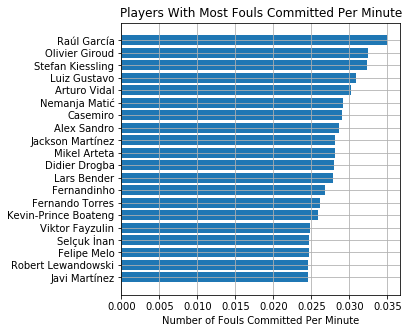

In [49]:
fouls_cpm = p_stats_five_df.sort_values(by='fc_per_min', ascending=False)['fc_per_min'][:20]
p_utils.make_barplot(fouls_cpm.index, fouls_cpm.values, 'Number of Fouls Committed Per Minute', 'Players With Most Fouls Committed Per Minute', (5,5))

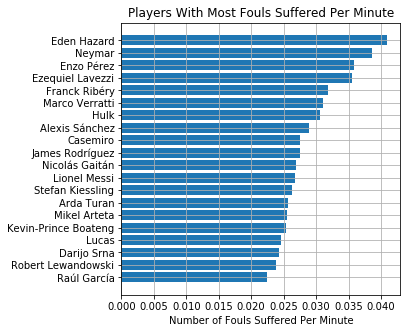

In [50]:
fouls_spm = p_stats_five_df.sort_values(by='fs_per_min', ascending=False)['fs_per_min'][:20]
p_utils.make_barplot(fouls_spm.index, fouls_spm.values, 'Number of Fouls Suffered Per Minute', 'Players With Most Fouls Suffered Per Minute', (5,5))

These names make more sense now. We see a lot of the ones we'd previously seen, and we see that now Neymar is higher up on the list.

Who has the magic touch? Let's see which players had the highest percentage of completed passes in the last five years.

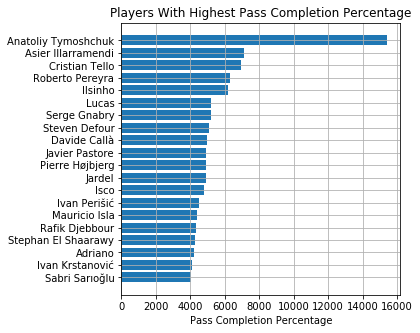

In [51]:
pass_pct = p_stats_five_df.sort_values(by='pass_pct', ascending=False)['pass_pct'][:20]
p_utils.make_barplot(pass_pct.index, pass_pct.values, 'Pass Completion Percentage', 'Players With Highest Pass Completion Percentage', (5,5))

We have the same case as with the fouls. Let's apply the same filter (minutes must be greater than or equal to one standard deviation above the mean).

In [52]:
p_stats_five_df['filt_pass_pct'] = np.where(p_stats_five_df['minutes'] < 1320, 0, p_stats_five_df['pass_pct'])

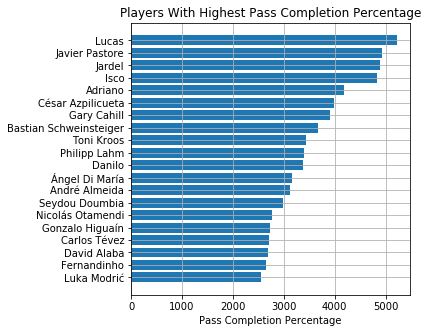

In [53]:
pass_pct = p_stats_five_df.sort_values(by='filt_pass_pct', ascending=False)['filt_pass_pct'][:20]
p_utils.make_barplot(pass_pct.index, pass_pct.values, 'Pass Completion Percentage', 'Players With Highest Pass Completion Percentage', (5,5))

These results are not surprising. We observe that most of these players are midfielders; part of a midfielder's role is to move the ball (to either recover it from the opposition or receive it from a teammate and "distribute" it to other sections of the pitch by passing it to teammates).

##### Analysis of Team Skills

What do teams that get knocked out in the group phase look like in comparison to those who get to the semi-finals stage?

NOTE: I did not write the following code to create the radar chart. I'd like to give credit to the example provided in http://stackoverflow.com/questions/24659005/radar-chart-with-multiple-scales-on-multiple-axes.

In [54]:
import pickle

ko_avg = pickle.load(open('data/csvs_for_nb/ko_avg.p', 'rb'))
sf_avg = pickle.load(open('data/csvs_for_nb/sf_avg.p', 'rb'))

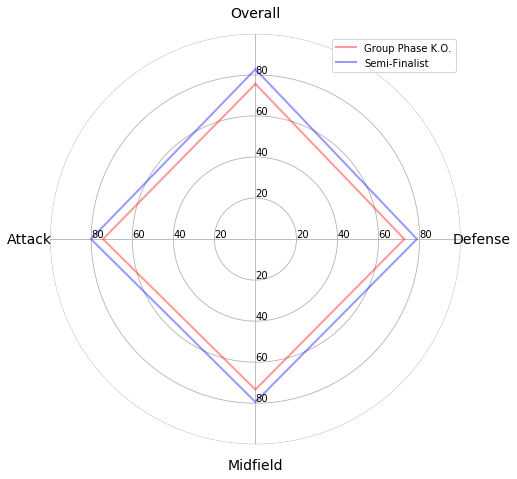

In [55]:
p_utils.make_radar_plot(['Overall', 'Attack', 'Midfield', 'Defense'],
                [list(ko_avg.values()), list(sf_avg.values())],
                ['r', 'b'],
                ["Group Phase K.O.", "Semi-Finalist"],
                [20, 40, 60, 80])

## Conclusion

It would have been a lot of fun to do this for more than just the last ten years. Although some of the player's match stats (offsides, fouls, passes, etc.) would be missing if I tried doing this for more than ten years, other analysis on pieces such as appearences and minutes could still be carried out. It's worth noting, however, that the format of the tournament was different prior to the season ending in 2004, and so the number of teams eliminated in the group phase would be different (which is something to keep in mind when comparing skill levels).

Future work would incorporate skill data at a player level (not available for a lot of players, not available at all prior to 2007). An interesting set of questions to explore is: Where do managers come from? Where do referees come from? When do are most goals scored? (In the last 15 minutes?) Who's the player who's scored the most goals in the last 10 minutes of a game? Who's the team that's scored the most goals in the last 10 minutes of a game? All of these questions could be answered with the data that I gathered.

Something else that would also be very interesting to explore is outfitter deals. I was not able to find information on this, but if one could fetch data on this topic, the analysis would provide a window into the world of sports endorsements, and how they've changed over the last years. When did brands realize that players could be moving advertisements, and that kids would want to wear whatever their idol wears? What does the market share of outfitters look like at a player level? Do all players wear either Adidas or Nike, or do a lot of players also wear Puma? How has this changed over the past few years? What new outiftters have emerged recently? When did New Balance and Under Armor start trying to break into soccer? How successful have they been?

Doing this project, I got first-hand experience with how it is that missing values arise in data, and I learned about different ways to ask questions and to think about what the correct pieces of data to be looking at are, and *how* to visualize them (I at first had tried plotting team performances using line plots, but realized that this was much easier to understand when looked at discretely). Lastly, I also was surprised with a lot of my findings; I did not know, for example, that red cards and penalties were so rare in the Champions League, that Borussia Dortmund had had two clearly distinct periods of success in history (separated by a difficult period of struggle), or that Anderlecht had such a good academy.